In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import json
import nltk
nltk.download('punkt')
import pandas as pd
import re,string
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
def read_data():
  #data_train
  with open('drive/My Drive/Colab Notebooks/data_latih.json', 'r') as myfile:
    data=myfile.read()
  obj = json.loads(data)
  #data kamus
  data_dict=pd.read_csv("drive/My Drive/Colab Notebooks/dictionary.csv")
  #key norm
  data_key=pd.read_csv("drive/My Drive/Colab Notebooks/key_norm.csv")
  #stop word
  data_stop = set(open('stopword_list_TALA.txt'))
  return obj,data_dict,data_key,data_stop

In [0]:
def split_isi_sent(obj):
  data=[]
  for i in range(len(obj)):
    data.append(obj[i]['isi'])
  sentiment=[]
  for i in range(len(obj)):
    sentiment.append(obj[i]['sentimen'])
  return data,sentiment

In [0]:
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,'')
            text = text.lower()
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)
def ubah_kata(text,kamus):
  text=word_tokenize(text)
  kata_hasil=[]
  for kata in text:
    if (kata in kamus)==True:
      kata_hasil.append(kamus_saya.get(kata))
    else:
      kata_hasil.append(kata)
  #print(kata_hasil)
  return kata_hasil
def token_kata(text,data_stop):
  #text=word_tokenize(text)
  hasil_baris=[]
  filtered_sentence = [w for w in data1 if not w in data_stop]
  for w in text: 
    if w+"\n" not in data_stop: 
      hasil_baris.append(w)
  return hasil_baris

In [10]:
obj,data_dict,data_key,data_stop=read_data()
data,sentiment=split_isi_sent(obj)
data1=[]
data_ubah=[]
data_final=[]
#Menghapus tanda baca, link, username
for t in data:
  data1.append(strip_all_entities(strip_links(t)))
#Mengubah kata tidak baku
kamus_saya=dict(zip(data_key['singkat'],data_key['hasil']))
for j in data1:
  data_ubah.append(ubah_kata(j,kamus_saya))
#Menghapus stopword
for data in data_ubah:
  data_final.append(token_kata(data,data_stop))
print(data_final)

[['penasaran', 'terpilih', 'ak…'], ['melayani', 'warga', 'lahir', 'program'], ['golongan', 'sumbu', 'pendek', 'fpi', 'piaraan', 'keluarga', 'cendana', 'bibib', 'risiek', 'ulama', 'mesum', 'bisanya', 'demo', 'kerja'], ['didzolimi', 'bebas', '…'], ['prof', 'edward', 'omar', 'sharif', 'h', 'ahli', 'pidana', 'pndpt', 'ahli', 'unsur', 'pasal', '156a', 'kuhp'], ['didzolimi', 'bebas', '…'], ['gaul', 'badai', 'menata', 'kota'], ['penasaran', 'terpilih', 'ak…'], ['15', 'surah', 'al', 'maidah', '51', 'diartikan', 'mengharuskan', 'umat', 'memilih', 'pemimpin', 'muslim'], ['penjarabersih2', 'penjara', 'biar'], ['menunggu', 'program', 'unggulan'], ['didzolimi', 'bebas', '…'], ['ikuuut'], ['warga', 'negara', 'republik', 'indonesia', 'sosok'], ['wkwkwkada', 'udang', 'dbalik', 'batu'], ['dzolimi', 'bgmana', 'jelazz', 'mendolimi', 'umat', 'islamsampean', 'sehat'], ['7', 'contoh', 'analoginya', 'pencuri', 'indonesia', 'berdasarkan', 'hukum', 'positif', 'dihukum', 'pidana', 'penjara'], ['menista', 'agama

In [11]:
from nltk.probability import FreqDist
fdist=FreqDist()
for sentence in data_final:
  for word in sentence:
    fdist[word]+=1
fdist.most_common(20)

[('warga', 70),
 ('…', 47),
 ('program', 35),
 ('pilih', 20),
 ('rumah', 20),
 ('pilkada', 19),
 ('kerja', 18),
 ('semoga', 18),
 ('2', 18),
 ('pemimpin', 17),
 ('1', 17),
 ('rakyat', 16),
 ('bukti', 16),
 ('basukidjarot', 16),
 ('kota', 15),
 ('langsung', 15),
 ('yuk', 14),
 ('putaran', 14),
 ('pendukung', 14),
 ('bangun', 14)]

In [0]:
kalimat_final=[]
for kal in data_final:
  kalimat=''
  for kata in kal:
    kalimat=kalimat+' '+kata
  kalimat_final.append(kalimat)
#print(kalimat_final)

In [13]:
kalimat_final

[' penasaran terpilih ak…',
 ' melayani warga lahir program',
 ' golongan sumbu pendek fpi piaraan keluarga cendana bibib risiek ulama mesum bisanya demo kerja',
 ' didzolimi bebas …',
 ' prof edward omar sharif h ahli pidana pndpt ahli unsur pasal 156a kuhp',
 ' didzolimi bebas …',
 ' gaul badai menata kota',
 ' penasaran terpilih ak…',
 ' 15 surah al maidah 51 diartikan mengharuskan umat memilih pemimpin muslim',
 ' penjarabersih2 penjara biar',
 ' menunggu program unggulan',
 ' didzolimi bebas …',
 ' ikuuut',
 ' warga negara republik indonesia sosok',
 ' wkwkwkada udang dbalik batu',
 ' dzolimi bgmana jelazz mendolimi umat islamsampean sehat',
 ' 7 contoh analoginya pencuri indonesia berdasarkan hukum positif dihukum pidana penjara',
 ' menista agama yaa',
 ' kultwit poinpoin saksi ahli sidang yuk disimak',
 ' kultwit poinpoin saksi ahli sidang yuk disimak',
 ' kultwit poinpoin saksi ahli sidang yuk disimak',
 ' kultwit poinpoin saksi ahli sidang yuk disimak',
 ' semoga unggul putar

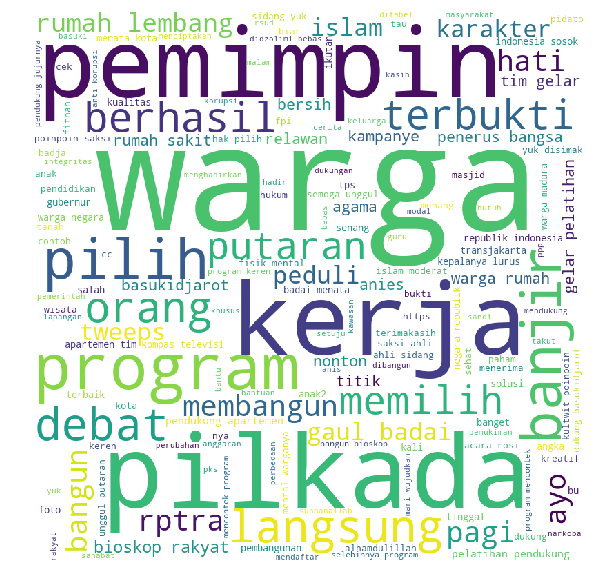

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
comment_words=''
for kalimat in kalimat_final:
  comment_words=comment_words+kalimat
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [15]:
pip install python-crfsuite

     |████████████████████████████████| 757kB 2.8MB/s 


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer() #menghitung kemunculan kata
features=(vectorizer.fit_transform(kalimat_final).todense()) #representasu fitur
print(vectorizer.vocabulary_)

{'penasaran': 1147, 'terpilih': 1524, 'ak': 71, 'melayani': 866, 'warga': 1621, 'lahir': 775, 'program': 1259, 'golongan': 487, 'sumbu': 1453, 'pendek': 1154, 'fpi': 470, 'piaraan': 1218, 'keluarga': 672, 'cendana': 305, 'bibib': 244, 'risiek': 1307, 'ulama': 1586, 'mesum': 988, 'bisanya': 254, 'demo': 336, 'kerja': 698, 'didzolimi': 364, 'bebas': 167, 'prof': 1257, 'edward': 432, 'omar': 1081, 'sharif': 1398, 'ahli': 61, 'pidana': 1219, 'pndpt': 1236, 'unsur': 1594, 'pasal': 1108, '156a': 6, 'kuhp': 763, 'gaul': 477, 'badai': 132, 'menata': 903, 'kota': 748, '15': 5, 'surah': 1457, 'al': 80, 'maidah': 823, '51': 35, 'diartikan': 343, 'mengharuskan': 943, 'umat': 1587, 'memilih': 885, 'pemimpin': 1141, 'muslim': 1024, 'penjarabersih2': 1177, 'penjara': 1176, 'biar': 240, 'menunggu': 968, 'unggulan': 1593, 'ikuuut': 552, 'negara': 1035, 'republik': 1300, 'indonesia': 557, 'sosok': 1432, 'wkwkwkada': 1634, 'udang': 1583, 'dbalik': 331, 'batu': 163, 'dzolimi': 429, 'bgmana': 238, 'jelazz'

In [100]:
frame_feat=pd.DataFrame(features)
frame_feat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1605,1606,1607,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
frame_sent=pd.DataFrame(sentiment,columns=['sentiment'])
frame_sent.head()

,sentiment
0,netral
1,positif
2,negatif
3,positif
4,positif


In [103]:
frame_sent['sentiment'] = pd.Categorical(frame_sent['sentiment']).codes
frame_sent.head()

,sentiment
0,1
1,2
2,0
3,2
4,2


In [110]:
data_all = pd.concat([frame_feat, frame_sent],axis=1)
data_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1606,1607,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,sentiment
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [117]:
vectorizer.vocabulary_.get('pemimpin')

1141

In [118]:
data_all[data_all[1141]>0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1606,1607,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,sentiment
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import argparse

In [0]:
models = {
    "knn": KNeighborsClassifier(n_neighbors=1),
    "naive_bayes": GaussianNB(),
    "logit": LogisticRegression(solver="lbfgs",multi_class="auto"),
    "svm": SVC(kernel="rbf",gamma="auto"),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(n_estimators=100),
    "mlp": MLPClassifier(),
}

In [0]:
y = data_all['sentiment'].copy(deep=True)
X = data_all.copy(deep=True)
X.drop(['sentiment'], inplace=True, axis=1)

In [126]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1605,1606,1607,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [127]:
y.head()

0    1
1    2
2    0
3    2
4    2
Name: sentiment, dtype: int8

In [0]:
(trainX,testX,trainY,testY)=train_test_split(X,y,test_size=0.25,random_state=12)

In [130]:
model=models["logit"]
model.fit(trainX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
predictions=model.predict(testX)
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.56      0.43      0.49        44
           1       0.64      0.40      0.49        40
           2       0.61      0.80      0.69        79

    accuracy                           0.60       163
   macro avg       0.60      0.54      0.56       163
weighted avg       0.60      0.60      0.59       163



In [133]:
model=models["random_forest"]
model.fit(trainX,trainY)
predictions=model.predict(testX)
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.69      0.41      0.51        44
           1       0.41      0.75      0.53        40
           2       0.70      0.56      0.62        79

    accuracy                           0.56       163
   macro avg       0.60      0.57      0.55       163
weighted avg       0.62      0.56      0.57       163

